In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [2]:
data = pd.read_csv("Tweets.csv")
data

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703060e+17,neutral,1.0000,No complain,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,24-02-2015 11:35,NaN,Eastern Time (US & Canada)
1,5.703010e+17,positive,0.3486,No complain,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,24-02-2015 11:15,NaN,Pacific Time (US & Canada)
2,5.703010e+17,neutral,0.6837,No complain,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,24-02-2015 11:15,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,24-02-2015 11:15,NaN,Pacific Time (US & Canada)
4,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,24-02-2015 11:14,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,5.695880e+17,positive,0.3487,No complain,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,22-02-2015 12:01,NaN,NaN
14636,5.695870e+17,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,22-02-2015 11:59,Texas,NaN
14637,5.695870e+17,neutral,1.0000,No complain,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,22-02-2015 11:59,"Nigeria,lagos",NaN
14638,5.695870e+17,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,22-02-2015 11:59,New Jersey,Eastern Time (US & Canada)


In [3]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703060e+17,neutral,1.0000,No complain,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,24-02-2015 11:35,NaN,Eastern Time (US & Canada)
1,5.703010e+17,positive,0.3486,No complain,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,24-02-2015 11:15,NaN,Pacific Time (US & Canada)
2,5.703010e+17,neutral,0.6837,No complain,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,24-02-2015 11:15,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,24-02-2015 11:15,NaN,Pacific Time (US & Canada)
4,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,24-02-2015 11:14,NaN,Pacific Time (US & Canada)


In [4]:
data.tail()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
14635,5.695880e+17,positive,0.3487,No complain,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,22-02-2015 12:01,NaN,NaN
14636,5.695870e+17,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,22-02-2015 11:59,Texas,NaN
14637,5.695870e+17,neutral,1.0000,No complain,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,22-02-2015 11:59,"Nigeria,lagos",NaN
14638,5.695870e+17,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,22-02-2015 11:59,New Jersey,Eastern Time (US & Canada)
14639,5.695870e+17,neutral,0.6771,No complain,0.0000,American,NaN,daviddtwu,NaN,0,@AmericanAir we have 8 ppl so we need 2 know h...,NaN,22-02-2015 11:58,"dallas, TX",NaN


In [5]:
data.shape

(14640, 15)

In [6]:
data.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [7]:
data.duplicated().sum()

36

In [8]:
data.drop_duplicates(inplace = True)
data.duplicated().sum()

0

In [9]:
data.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                      0
negativereason_confidence        4101
airline                             0
airline_sentiment_gold          14564
name                                0
negativereason_gold             14572
retweet_count                       0
text                                0
tweet_coord                     13589
tweet_created                       0
tweet_location                   4723
user_timezone                    4814
dtype: int64

In [10]:
data=data.drop("tweet_coord", axis=1)
data=data.drop("negativereason_gold", axis=1)
data=data.drop("airline_sentiment_gold", axis=1)

In [11]:
data=data.fillna(data['negativereason_confidence'].mean())

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14604 entries, 0 to 14639
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14604 non-null  float64
 1   airline_sentiment             14604 non-null  object 
 2   airline_sentiment_confidence  14604 non-null  float64
 3   negativereason                14604 non-null  object 
 4   negativereason_confidence     14604 non-null  float64
 5   airline                       14604 non-null  object 
 6   name                          14604 non-null  object 
 7   retweet_count                 14604 non-null  int64  
 8   text                          14604 non-null  object 
 9   tweet_created                 14604 non-null  object 
 10  tweet_location                14604 non-null  object 
 11  user_timezone                 14604 non-null  object 
dtypes: float64(3), int64(1), object(8)
memory usage: 1.4+ MB


In [13]:
data.isnull()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
14635,False,False,False,False,False,False,False,False,False,False,False,False
14636,False,False,False,False,False,False,False,False,False,False,False,False
14637,False,False,False,False,False,False,False,False,False,False,False,False
14638,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
data.dtypes

tweet_id                        float64
airline_sentiment                object
airline_sentiment_confidence    float64
negativereason                   object
negativereason_confidence       float64
airline                          object
name                             object
retweet_count                     int64
text                             object
tweet_created                    object
tweet_location                   object
user_timezone                    object
dtype: object

In [15]:
data.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.460400e+04,14604.000000,14604.000000,14604.000000
mean,5.692157e+17,0.899923,0.637644,0.082786
std,7.782549e+14,0.162955,0.280174,0.746647
min,5.675880e+17,0.335000,0.000000,0.000000
25%,5.685580e+17,0.692300,0.637644,0.000000
50%,5.694725e+17,1.000000,0.637644,0.000000
75%,5.698882e+17,1.000000,0.703000,0.000000
max,5.703110e+17,1.000000,1.000000,44.000000


In [16]:
data["airline"].unique()

array(['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways',
       'American'], dtype=object)

In [17]:
data["airline_sentiment"].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In [18]:
data["name"].unique()

array(['cairdin', 'jnardino', 'yvonnalynn', ..., 'KristenReenders',
       'itsropes', 'sanyabun'], dtype=object)

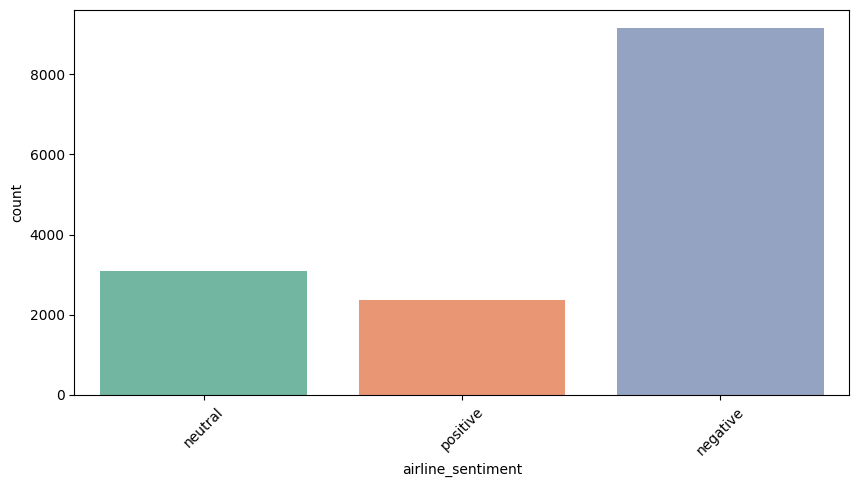

In [19]:
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='airline_sentiment',palette="Set2")
plt.xticks(rotation=45)
plt.show()

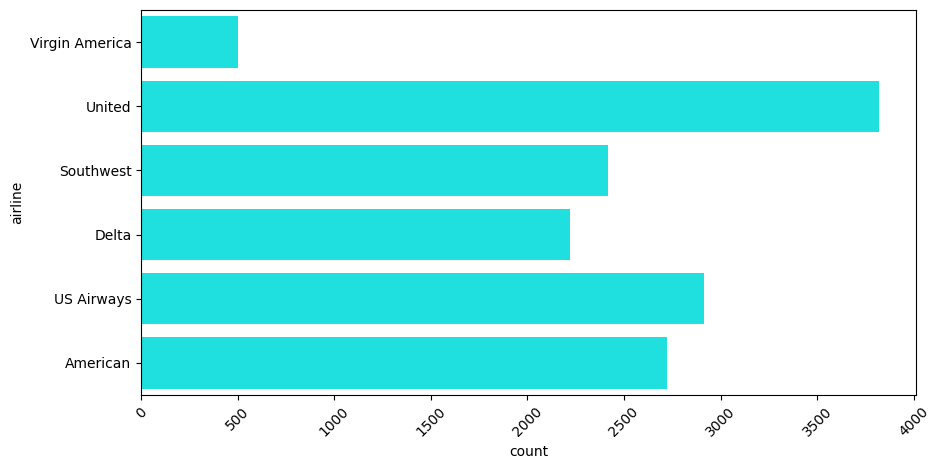

In [20]:
plt.figure(figsize=(10, 5))
sns.countplot(data=data, y='airline', color='cyan')
plt.xticks(rotation=45)
plt.show()

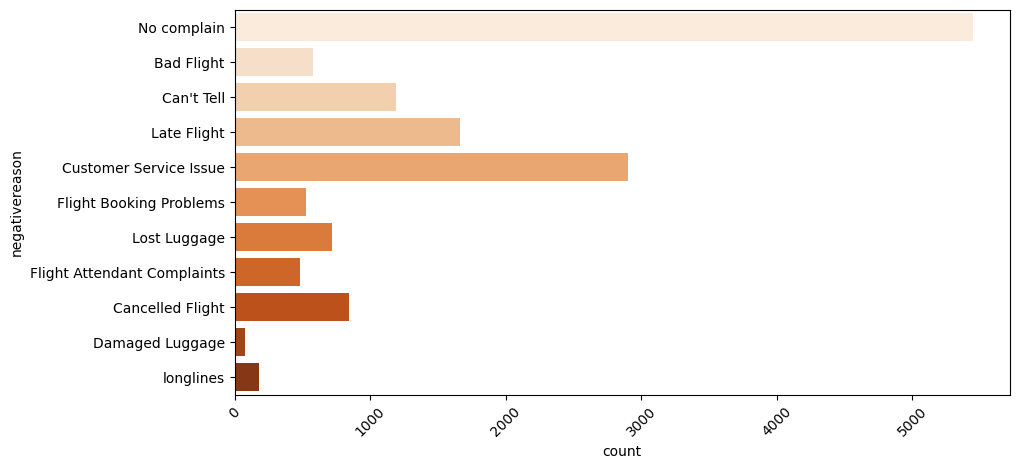

In [21]:
plt.figure(figsize=(10, 5))
sns.countplot(data=data, y='negativereason',hue='negativereason', palette='Oranges')
plt.xticks(rotation=45)
plt.show()

<Axes: ylabel='airline_sentiment'>

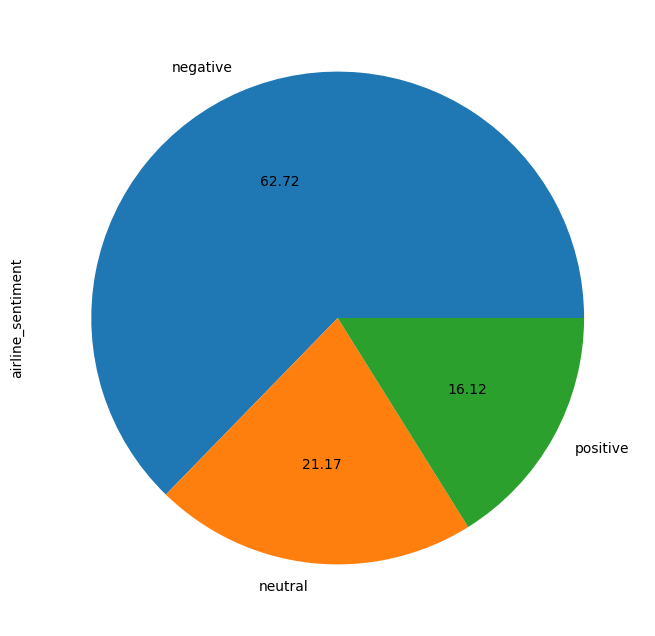

In [22]:
plt.subplots(figsize=(8,8))
data['airline_sentiment'].value_counts(normalize=True).plot(kind='pie',autopct='%.2f')

<Axes: ylabel='retweet_count'>

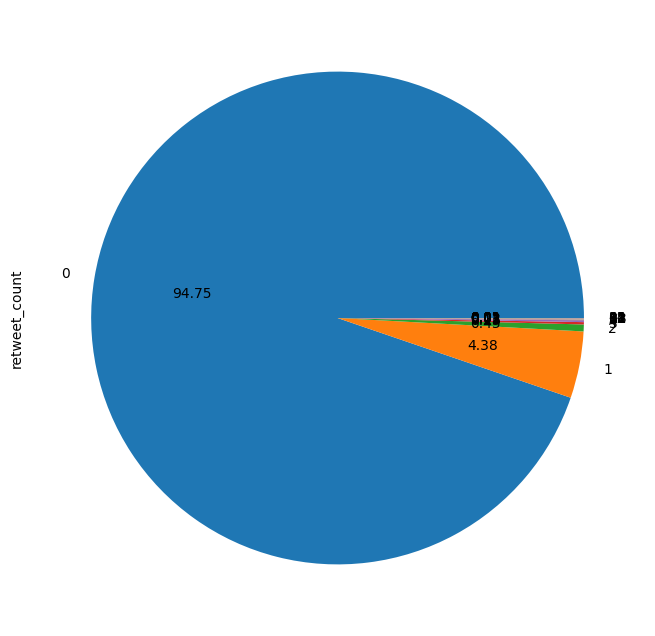

In [23]:
plt.subplots(figsize=(8,8))
data['retweet_count'].value_counts(normalize=True).plot(kind='pie',autopct='%.2f')

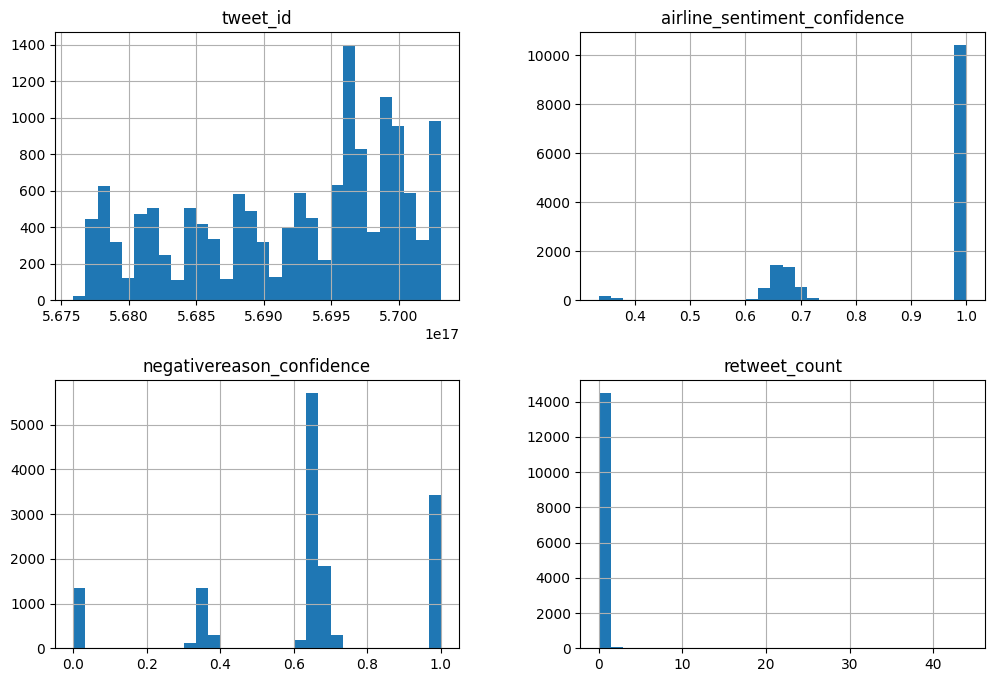

In [24]:
data.hist(bins=30,figsize=(12,8))
plt.show()

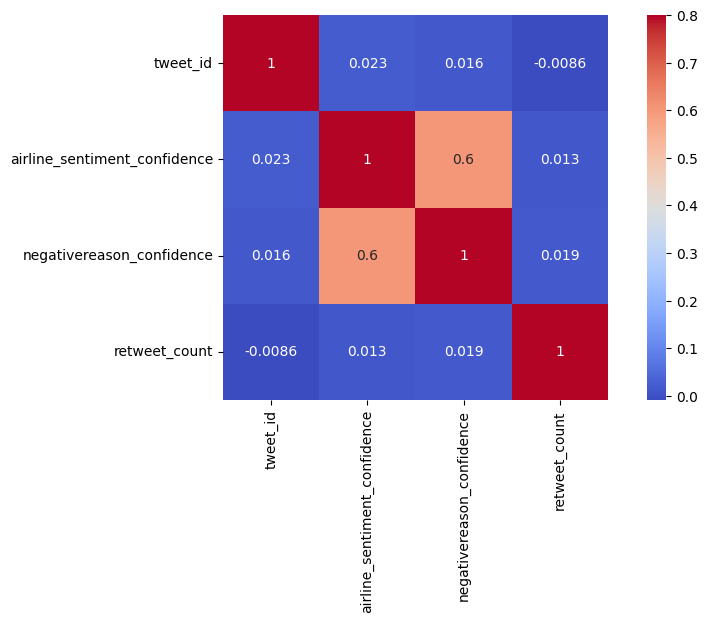

In [25]:
corrmat = data.corr()
fig = plt.figure(figsize = (10, 5))
sns.heatmap(corrmat, vmax = .8, square = True, annot = True,cmap="coolwarm")
plt.show()

In [26]:
x= data.drop("airline_sentiment",axis=1)
y= data["airline_sentiment"]

In [27]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2)

In [28]:
c= make_column_transformer((MinMaxScaler(),["tweet_id"]))
(OneHotEncoder(handle_unknown='ignore'),["airline","retweet_count"])
c.fit(x_train)
train=c.transform(x_train)
test=c.transform(x_test)

In [29]:
model= LogisticRegression()
model.fit(train,y_train)

LogisticRegression()

In [30]:
y_pred= model.predict(test)
print(y_pred)
accuracy= accuracy_score(y_pred, y_test)*100
print(accuracy)

['negative' 'negative' 'negative' ... 'negative' 'negative' 'negative']
62.10201985621363


In [31]:
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

    negative       0.62      1.00      0.77      1814
     neutral       0.00      0.00      0.00       643
    positive       0.00      0.00      0.00       464

    accuracy                           0.62      2921
   macro avg       0.21      0.33      0.26      2921
weighted avg       0.39      0.62      0.48      2921



In [32]:
model1=KNeighborsClassifier()
model1.fit(train,y_train)

KNeighborsClassifier()

In [33]:
print("Accuracy=",model1.score(test,y_test)*100)

Accuracy= 58.26771653543307


In [34]:
model2 = DecisionTreeClassifier()
model2.fit(train, y_train)

DecisionTreeClassifier()

In [35]:
print("Accuracy=",model2.score(test,y_test)*100)

Accuracy= 57.03526189661075


In [36]:
model3 = SVC()
model3.fit(train,y_train)

SVC()

In [37]:
print("Accuracy: ",model3.score(test, y_test) * 100)

Accuracy:  62.10201985621363
